In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

# loading data from MNIST
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

Using TensorFlow backend.


In [2]:
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

# transfer label to one-hot encoding
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [3]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

# layer 1
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

# layer2
model.add(Dense(units=128, 
                kernel_initializer='normal', 
                activation='relu'))

# layer3
model.add(Dense(units=64, 
                kernel_initializer='normal', 
                activation='relu'))

# layer 4
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 175us/step - loss: 0.2800 - acc: 0.9176 - val_loss: 0.1172 - val_acc: 0.9646
Epoch 2/10
48000/48000 [==============================] - 8s 163us/step - loss: 0.1063 - acc: 0.9676 - val_loss: 0.0993 - val_acc: 0.9705
Epoch 3/10
48000/48000 [==============================] - 8s 168us/step - loss: 0.0726 - acc: 0.9769 - val_loss: 0.0955 - val_acc: 0.9715
Epoch 4/10
48000/48000 [==============================] - 8s 174us/step - loss: 0.0509 - acc: 0.9837 - val_loss: 0.0953 - val_acc: 0.9732
Epoch 5/10
48000/48000 [==============================] - 8s 175us/step - loss: 0.0434 - acc: 0.9862 - val_loss: 0.0963 - val_acc: 0.9724
Epoch 6/10
48000/48000 [==============================] - 8s 174us/step - loss: 0.0350 - acc: 0.9883 - val_loss: 0.0931 - val_acc: 0.9745
Epoch 7/10
48000/48000 [==============================] - 9s 184us/step - 

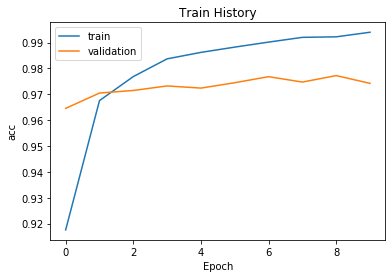

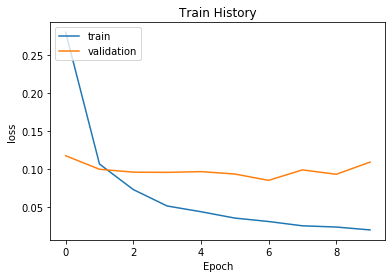

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

In [6]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print('\naccuracy=',scores[1])

10000/10000 [==============================] - 0s 47us/step

accuracy= 0.9773
